### 1.import data

In [4]:
import wget
import pandas as pd
url = "https://github.com/HEKYPTO/TrafficJam/blob/main/trafficJam.csv?raw=true"
wget.download(url)
df = pd.read_csv("trafficJam (3).csv", index_col=[0])

In [5]:
df

,cars
date,
2022-06-01 00:00:00,2
2022-06-01 00:05:00,2
2022-06-01 00:10:00,2
2022-06-01 00:15:00,2
2022-06-01 00:20:00,1
...,...
2022-08-12 23:35:00,11
2022-08-12 23:40:00,33
2022-08-12 23:45:00,16


### 2.Plot data
  Plot data to see data trend

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import matplotlib
print(matplotlib.__version__)

3.3.4


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from matplotlib.pyplot import figure


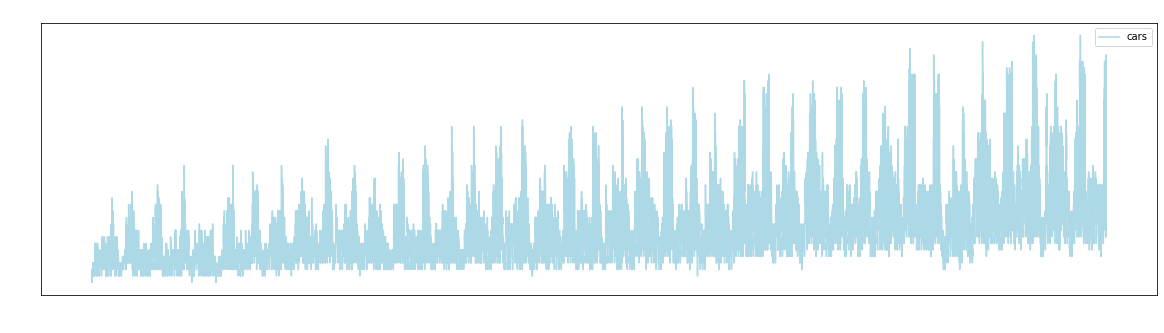

In [9]:
%matplotlib inline

#df.plot(color='lightblue',label='Traffic')
ax =df.plot(color='lightblue',label='Traffic', figsize = (20,5))
ax.set_xlabel('Date')
ax.set_ylabel('Cars')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')
ax.set_title('Triaffic')
ax.title.set_color('white')

### 3. Select data 

In [10]:
#set parameter
p,d,q = 2,1,0
P,D,Q,m = 2,1,0,288
order =(p,d,q)
seasonal_order =(P,D,Q,m)

In [11]:
df = pd.DataFrame(data=df)
df

,cars
date,
2022-06-01 00:00:00,2
2022-06-01 00:05:00,2
2022-06-01 00:10:00,2
2022-06-01 00:15:00,2
2022-06-01 00:20:00,1
...,...
2022-08-12 23:35:00,11
2022-08-12 23:40:00,33
2022-08-12 23:45:00,16


In [12]:
df.index

Index(['2022-06-01 00:00:00', '2022-06-01 00:05:00', '2022-06-01 00:10:00',
       '2022-06-01 00:15:00', '2022-06-01 00:20:00', '2022-06-01 00:25:00',
       '2022-06-01 00:30:00', '2022-06-01 00:35:00', '2022-06-01 00:40:00',
       '2022-06-01 00:45:00',
       ...
       '2022-08-12 23:10:00', '2022-08-12 23:15:00', '2022-08-12 23:20:00',
       '2022-08-12 23:25:00', '2022-08-12 23:30:00', '2022-08-12 23:35:00',
       '2022-08-12 23:40:00', '2022-08-12 23:45:00', '2022-08-12 23:50:00',
       '2022-08-12 23:55:00'],
      dtype='object', name='date', length=21024)

In [13]:
df1=df.copy()#.set_index('date')
df1.head(5)

,cars
date,
2022-06-01 00:00:00,2
2022-06-01 00:05:00,2
2022-06-01 00:10:00,2
2022-06-01 00:15:00,2
2022-06-01 00:20:00,1


In [14]:
df2=df1[-1440:]

### 4. Stationary test

In [15]:
import seaborn as sns

In [16]:
#Calculate rolling mean and rolling standard diviation
rolm = df2.rolling(window=2).mean()
rols = df2.rolling(window=2).std()

In [17]:
rolm

,cars
date,
2022-08-08 00:00:00,NaN
2022-08-08 00:05:00,14.5
2022-08-08 00:10:00,12.0
2022-08-08 00:15:00,11.0
2022-08-08 00:20:00,10.5
...,...
2022-08-12 23:35:00,17.0
2022-08-12 23:40:00,22.0
2022-08-12 23:45:00,24.5


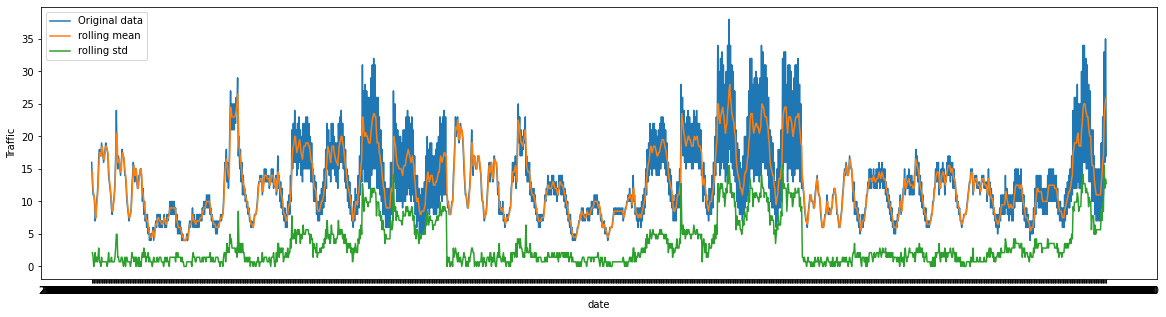

In [18]:
plt.figure( figsize = ( 20, 5))
sns.lineplot( x = df2.index,
             y = 'cars',
             data = df2,
             label = 'Original data')

sns.lineplot( x = rolm.index,
             y = 'cars',
             data = rolm,
             label = 'rolling mean')
sns.lineplot( x = rols.index,
             y = 'cars',
             data = rols,
             label = 'rolling std')
  
plt.ylabel('Traffic')

plt.legend()
plt.show()

The data is not stationary because data have seaaonal.

In [19]:
%matplotlib inline
def plot_autocor(data, lags = None):
    plt.figure(figsize=(15,4))
    plt.subplot(221) #w x h x id
    plt.title('Series')
    plt.plot(data)
    plt.subplot(222)
    plt.title('histogram')
    plt.hist(data)
    plt.show()
    sm.tsa.graphics.plot_acf(data, lags=lags,zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags,zero=False)
    plt.show()


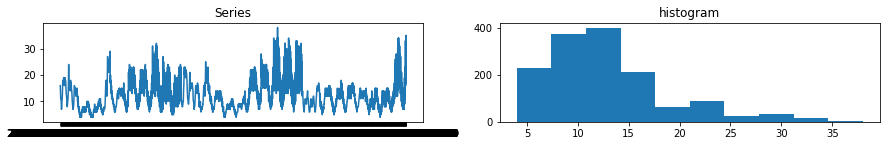

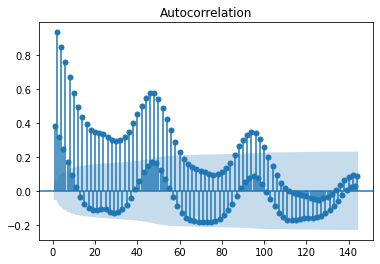

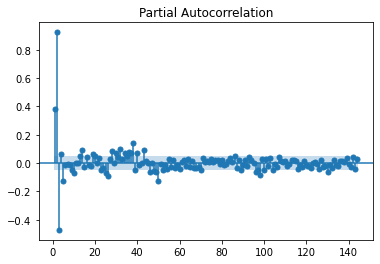

In [20]:
%matplotlib inline
plot_autocor(df2,lags=144)

### 5. Data transformation

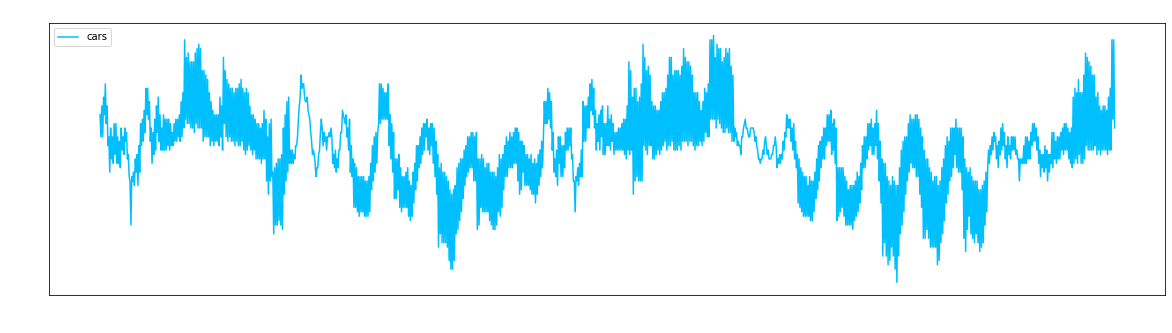

In [21]:
#use diff to transform dataset
#ax =df.plot(color='lightblue',label='Traffic', figsize = (20,5))
diff_df2=df2.diff(288)
ax2 =diff_df2.plot(color='deepskyblue',label='Traffic', figsize = (20,5))
ax2.set_xlabel('Date')
ax2.set_ylabel('Diff')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')
ax2.yaxis.label.set_color('white')
ax2.xaxis.label.set_color('white')
ax2.set_title('Traffic_diff')
ax2.title.set_color('white')

In [22]:
#create set of diff 
df2_diff=df2.diff(288)[288:]

### 6. Apply model SARIMA

In [23]:
#check index
df2_diff.index

Index(['2022-08-09 00:00:00', '2022-08-09 00:05:00', '2022-08-09 00:10:00',
       '2022-08-09 00:15:00', '2022-08-09 00:20:00', '2022-08-09 00:25:00',
       '2022-08-09 00:30:00', '2022-08-09 00:35:00', '2022-08-09 00:40:00',
       '2022-08-09 00:45:00',
       ...
       '2022-08-12 23:10:00', '2022-08-12 23:15:00', '2022-08-12 23:20:00',
       '2022-08-12 23:25:00', '2022-08-12 23:30:00', '2022-08-12 23:35:00',
       '2022-08-12 23:40:00', '2022-08-12 23:45:00', '2022-08-12 23:50:00',
       '2022-08-12 23:55:00'],
      dtype='object', name='date', length=1152)

In [24]:
#parameter
p, d, q =3,1,0
P, D, Q,m = 2,1,0,288
order =(p,d,q)
seasonal_order = (P,D,Q,m)

In [25]:
df2_diff.index = pd.DatetimeIndex(df2_diff.index).to_period('D')

In [26]:
model = sm.tsa.statespace.SARIMAX(df2_diff, order=order,seasonal_order=seasonal_order,enforce_stationarity = False,enforce_invertibility=False).fit()

KeyboardInterrupt: 

In [ ]:
model.summary()

### 7. Fit result

In [ ]:
plt.plot(model.fittedvalues)
plt.plot(df2_diff)

In [ ]:
plot_autocor(model.resid[model.loglikelihood_burn:],lags =12);

### 8. Future prediction

In [ ]:
future_forecast = model.get_forecast(1440)
confidence_int =future_forecast.conf_int(alpha=0.1)
forec = future_forecast.predicted_mean

In [28]:
df2

,cars
date,
2022-08-08 00:00:00,16
2022-08-08 00:05:00,13
2022-08-08 00:10:00,11
2022-08-08 00:15:00,11
2022-08-08 00:20:00,10
...,...
2022-08-12 23:35:00,11
2022-08-12 23:40:00,33
2022-08-12 23:45:00,16


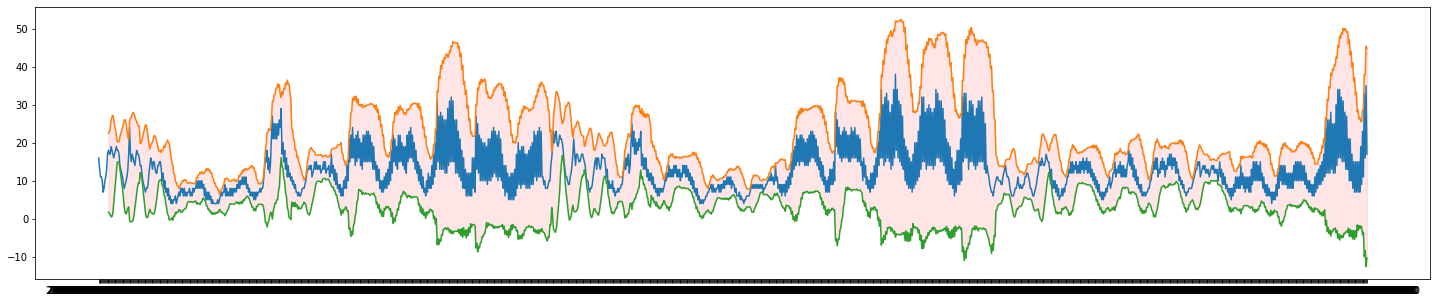

In [57]:
plt.figure(figsize =(25,5))
plt.plot(df2)
plt.plot(forec1)
plt.plot(forec2)
plt.fill_between(forec.index,forec[0],forec[0], color = 'r', alpha = 0.1)